## Mask R-CNN - Inspect Weights of a Trained Model

This notebook includes code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import keras

import mrcnn.utils
import mrcnn.model_mrcnn   as modellib
import mrcnn.model_fcn     as fcn_modellib
import mrcnn.visualize     as visualize
from   mrcnn.utils         import log
from   mrcnn.prep_notebook import mrcnn_coco_train

# Root directory of the project
# ROOT_DIR = os.getcwd()
# Directory to save logs and trained model
# MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to COCO trained weights
# COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# ROOT_DIR          = "E:\\"
# MODEL_PATH        = os.path.join(ROOT_DIR, "models")
# DATASET_PATH      = os.path.join(ROOT_DIR, 'MLDatasets')
# #### MODEL_DIR    = os.path.join(MODEL_PATH, "mrcnn_logs")
# COCO_MODEL_PATH   = os.path.join(MODEL_PATH, "mask_rcnn_coco.h5")
# DEFAULT_LOGS_DIR  = os.path.join(MODEL_PATH, "mrcnn_coco_logs")
# COCO_DATASET_PATH = os.path.join(DATASET_PATH,"coco2014")
# RESNET_MODEL_PATH = os.path.join(MODEL_PATH, "resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")
# Path to Shapes trained weights

# model_file  = 'E:\\Models\\newshape_fcn\\mask_rcnn_shapes_0991.h5'
# folder_name = 'newshape_fcn'
# MODEL_DIR = os.path.join(MODEL_PATH, folder_name)

/users/students/r0653928/anaconda3/envs/TF35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


 Initialize CocoConfig object - super
 Linx  Linux
Tensorflow Version: 1.6.0   Keras Version : 2.1.3 


In [ ]:
# SHAPES_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_shapes.h5")
# SHAPES_MODEL_PATH = 'E:\\Models\\newshape_mrcnn\\shapes20180621T1554\\mask_rcnn_shapes_0110.h5'
# SHAPES_MODEL_PATH = '/esat/tiger/joramas/mscStudentsData/kbardool/models/train_fcn_rmsprop/fcn20180809T1359/fcn_4530.h5'
# SHAPES_MODEL_PATH = '/esat/tiger/joramas/mscStudentsData/kbardool/models/train_fcn_rmsprop/fcn20180801T1337/fcn_2932.h5'
# SHAPES_MODEL_PATH = '/esat/tiger/joramas/mscStudentsData/kbardool/models/train_fcn_rmsprop/fcn20180728T1357/fcn_shapes_0798.h5'
# SHAPES_MODEL_PATH = '/esat/tiger/joramas/mscStudentsData/kbardool/models/train_fcn_adagrad/shapes20180727T1154/fcn_shapes_1283.h5'

## Configurations

In [ ]:
# Run one of the code blocks

# Shapes toy dataset
# import mrcnn.new_shapes as shapes
# fcn_config = shapes.NewShapesConfig()

# MS COCO Dataset
# import coco
# config = coco.CocoConfig()

## Notebook Preferences

In [2]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

In [3]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Model

In [4]:
# Create model in inference mode
# del model
with tf.device(DEVICE):
#     model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
    
    ##------------------------------------------------------------------------------------
    ## Build FCN Model in Training Mode
    ##------------------------------------------------------------------------------------
    try :
        del model
        gc.collect()
    except: 
        pass

#     fcn_model = fcn_modellib.FCN(mode="inference", config=fcn_config, model_dir=MODEL_DIR)
    model, _, _, _ , _, config = mrcnn_coco_train(mode = 'training')
    print(' COCO Model Path       : ', config.COCO_MODEL_PATH)
#     print(' Checkpoint folder Path: ', MODEL_DIR)
#     print(' Model Parent Path     : ', MODEL_PATH)    
#     model = modelfcn.MaskRCNN(mode="inference", config=config, model_dir=MODEL_DIR, FCN_layers = True)

>>> Initialize ModelBase model 
   Mode:  training
   Model dir :  /users/students/r0653928/models/train_mrcnn_coco
>>> ModelBase initialiation complete
>>> ---Initialize MRCNN model, mode:  training

----------------------------
>>> Resnet Graph 
----------------------------
     Input_image shape : (?, 1024, 1024, 3)
     After ZeroPadding2D  : (?, 1030, 1030, 3) (?, 1030, 1030, 3)
     After Conv2D padding : (?, 512, 512, 64) (?, 512, 512, 64)
     After BatchNorm      : (?, 512, 512, 64) (?, 512, 512, 64)
     C1 Shape: (?, 256, 256, 64) (?, 256, 256, 64)
     C2 Shape:  (?, 256, 256, 256) (?, 256, 256, 256)
     C3 Shape:  (?, 128, 128, 512) (?, 128, 128, 512)
     C4 Shape:  (?, 64, 64, 1024) (?, 64, 64, 1024)
     C5 Shape:  (?, 32, 32, 2048) (?, 32, 32, 2048)

>>> Feature Pyramid Network (FPN) Graph 
     FPN P2 shape : (None, 256, 256, 256)
     FPN P3 shape : (None, 128, 128, 256)
     FPN P4 shape : (None, 64, 64, 256)
     FPN P5 shape : (None, 32, 32, 256)
     FPN P6 shap

    pos_grid before transpse :  (?, 256, 256, 2)
    pos_grid after transpose :  (256, 256, ?, 2)
    >> input to MVN.PROB: pos_grid (meshgrid) shape:  (256, 256, ?, 2)
     Prob_grid shape from mvn.probe:  (256, 256, ?)
     Prob_grid shape after tanspose:  (?, 256, 256)
    << output probabilities shape  :  (?, 256, 256)

    normalization ------------------------------------------------------
    normalizer     :  (?, 1, 1)
    prob_grid_norm_scaled :  (?, 256, 256)

    Scatter out the probability distributions based on class --------------
    pt2_ind shape   :  (?, 3)
    prob_grid shape :  (?, 256, 256)
    gauss_scatt     :  (1, 81, 200, 256, 256)

    Reduce sum based on class ---------------------------------------------
    gaussian_heatmap shape     :  (1, 81, 256, 256) Keras tensor  False

    normalization ------------------------------------------------------
    normalizer shape       :  (1, 81, 1, 1)
    gauss norm            :  (1, 81, 256, 256)  Keras tensor  False
 

NameError: name 'COCO_MODEL_PATH' is not defined

### Load Weights

In [5]:
# SHAPES_MODEL_PATH = '/esat/tiger/joramas/mscStudentsData/kbardool/models/train_fcn_adagrad/shapes20180709T1732/fcn_shapes_0604.h5'
# SHAPES_MODEL_PATH = '/esat/tiger/joramas/mscStudentsData/kbardool/models/train_fcn_sgd/shapes20180709T1732/fcn_shapes_0412.h5'
# SHAPES_MODEL_PATH = 'E:\\Models\\newshape_mrcnn\\shapes20180621T1554\\mask_rcnn_shapes_0110.h5'
COCO_MODEL_PATH = '/esat/tiger/joramas/mscStudentsData/kbardool/models/train_mrcnn_coco/mrcnn20181012T1227/mrcnn_0002.h5'

print(mrcnn_config.NAME)
# Set weights file path
if config.NAME == "shapes":
    weights_path = SHAPES_MODEL_PATH
elif config.NAME == "mrcnn":
    weights_path = COCO_MODEL_PATH
# Or, uncomment to load the last model you trained
# weights_path = model.find_last()[1]
print('Weights model path:', weights_path)
# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

mrcnn
Weights model path: /esat/tiger/joramas/mscStudentsData/kbardool/models/train_mrcnn_coco/mrcnn20181012T1227/mrcnn_0002.h5
Loading weights  /esat/tiger/joramas/mscStudentsData/kbardool/models/train_mrcnn_coco/mrcnn20181012T1227/mrcnn_0002.h5
   >>> load_weights() from : /esat/tiger/joramas/mscStudentsData/kbardool/models/train_mrcnn_coco/mrcnn20181012T1227/mrcnn_0002.h5
{'_id': <h5py.h5f.FileID object at 0x7f3dc5e19ba0>, '_swmr_mode': False}
Layer Names from h5 file: 387 layers
  0;  input_image         ;   input_image 
  1;  zero_padding2d_1    ;   zero_padding2d_1 
  2;  conv1               ;   conv1 
  3;  bn_conv1            ;   bn_conv1 
  4;  activation_1        ;   activation_1 
  5;  max_pooling2d_1     ;   max_pooling2d_1 
  6;  res2a_branch2a      ;   res2a_branch2a 
  7;  bn2a_branch2a       ;   bn2a_branch2a 
  8;  activation_2        ;   activation_2 
  9;  res2a_branch2b      ;   res2a_branch2b 
 10;  bn2a_branch2b       ;   bn2a_branch2b 
 11;  activation_3        ;

   Weights file loaded: /esat/tiger/joramas/mscStudentsData/kbardool/models/train_mrcnn_coco/mrcnn20181012T1227/mrcnn_0002.h5 
  set_log_dir(): self.Checkpoint_path: /users/students/r0653928/models/train_mrcnn_coco/mrcnn20181012T1542/mrcnn_{epoch:04d}.h5 
  set_log_dir(): self.log_dir        : /users/students/r0653928/models/train_mrcnn_coco/mrcnn20181012T1542 
  set_log_dir(): Last completed epoch (self.epoch): 0 


'/esat/tiger/joramas/mscStudentsData/kbardool/models/train_mrcnn_coco/mrcnn20181012T1227/mrcnn_0002.h5'

## Review Weight Stats

In [7]:
# Show stats of all trainable weights    
visualize.display_weight_stats(model)

WEIGHT NAME,SHAPE,MIN,MAX,STD
conv1/kernel:0,"(7, 7, 3, 64)",-0.8616,+0.8451,+0.1315
conv1/bias:0,"(64,)",-0.0002,+0.0004,+0.0001
bn_conv1/gamma:0,"(64,)",+0.0835,+2.6411,+0.5091
bn_conv1/beta:0,"(64,)",-2.3931,+5.3610,+1.9781
bn_conv1/moving_mean:0,"(64,)",-173.0470,+116.3013,+44.5654
bn_conv1/moving_variance:0 *** Overflow?,"(64,)",+0.0000,+146335.3594,+21847.9668
res2a_branch2a/kernel:0,"(1, 1, 64, 64)",-0.6574,+0.3179,+0.0764
res2a_branch2a/bias:0,"(64,)",-0.0022,+0.0082,+0.0018
bn2a_branch2a/gamma:0,"(64,)",+0.2169,+1.8489,+0.4116
bn2a_branch2a/beta:0,"(64,)",-2.1180,+3.7332,+1.1786


## Histograms of Weights

TODO: cleanup this part

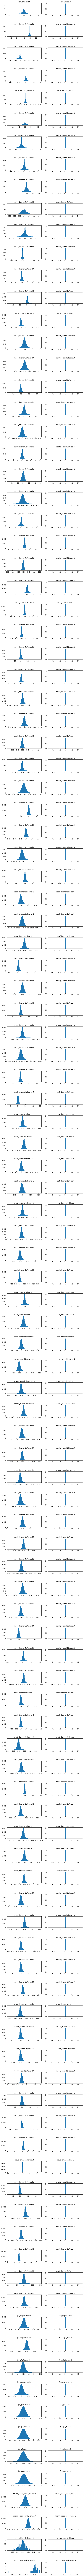

In [8]:
# Pick layer types to display
LAYER_TYPES = ['Conv2D', 'Dense', 'Conv2DTranspose']
# Get layers
layers = model.get_trainable_layers()
layers = list(filter(lambda l: l.__class__.__name__ in LAYER_TYPES, 
                layers))
# Display Histograms
fig, ax = plt.subplots(len(layers), 2, figsize=(10, 3*len(layers)),
                       gridspec_kw={"hspace":1})
for l, layer in enumerate(layers):
    weights = layer.get_weights()
    for w, weight in enumerate(weights):
        tensor = layer.weights[w]
        ax[l, w].set_title(tensor.name)
        _ = ax[l, w].hist(weight[w].flatten(), 100)


### Load Weights

In [ ]:
# Create model in inference mode
# with tf.device(DEVICE):
#     model = modellib.MaskRCNN(mode="inference", config=config, model_dir=MODEL_DIR, FCN_layers = False)
    
weights_path= 'E:\\Models\\newshape_mrcnn\\shapes20180621T1554\\mask_rcnn_shapes_0320.h5'
# Set weights file path
# Or, uncomment to load the last model you trained
# weights_path = model.find_last()[1]
# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

## Review Weight Stats

In [ ]:
# Show stats of all trainable weights    
visualize.display_weight_stats(model)

## Histograms of Weights

TODO: cleanup this part

In [ ]:
# Pick layer types to display
LAYER_TYPES = ['Conv2D', 'Dense', 'Conv2DTranspose']
# Get layers
layers = model.get_trainable_layers()
layers = list(filter(lambda l: l.__class__.__name__ in LAYER_TYPES, 
                layers))
# Display Histograms
fig, ax = plt.subplots(len(layers), 2, figsize=(10, 3*len(layers)),
                       gridspec_kw={"hspace":1})
for l, layer in enumerate(layers):
    weights = layer.get_weights()
    for w, weight in enumerate(weights):
        tensor = layer.weights[w]
        ax[l, w].set_title(tensor.name)
        _ = ax[l, w].hist(weight[w].flatten(), 50)

### Load Weights

In [ ]:
weights_path= 'E:\\Models\\newshape_mrcnn\\shapes20180621T1554\\mask_rcnn_shapes_0484.h5'

# Or, uncomment to load the last model you trained
# weights_path = model.find_last()[1]
# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

## Review Weight Stats

In [ ]:
# Show stats of all trainable weights    
visualize.display_weight_stats(model)

## Histograms of Weights

In [ ]:
# Pick layer types to display
LAYER_TYPES = ['Conv2D', 'Dense', 'Conv2DTranspose']
# Get layers
layers = model.get_trainable_layers()
layers = list(filter(lambda l: l.__class__.__name__ in LAYER_TYPES, 
                layers))
# Display Histograms
fig, ax = plt.subplots(len(layers), 2, figsize=(10, 3*len(layers)),
                       gridspec_kw={"hspace":1})
for l, layer in enumerate(layers):
    weights = layer.get_weights()
    for w, weight in enumerate(weights):
        tensor = layer.weights[w]
        ax[l, w].set_title(tensor.name)
        _ = ax[l, w].hist(weight[w].flatten(), 50)